# Plotting Time series Graphs

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [87]:
def plot_graph(x, y, type="", info="", ylim=None, no_fit=False):
    plt.plot(x, y, 'b')
    plt.title(type)

    if no_fit == False:
        res = linregress(x,y)
        fit_line = res.intercept + res.slope * x
        plt.plot(x, fit_line, 'r', linestyle='--')
        plt.legend([info, 'fit line (Trend)'])

    plt.ylabel('data')
    plt.xlabel('time')
    if ylim is not None:
        plt.ylim(bottom=ylim)
    plt.grid(True)

    plt.show()

## Trend

In [88]:
x = np.arange(1,100)
y = x**2
print(x)
print(y)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]
[   1    4    9   16   25   36   49   64   81  100  121  144  169  196
  225  256  289  324  361  400  441  484  529  576  625  676  729  784
  841  900  961 1024 1089 1156 1225 1296 1369 1444 1521 1600 1681 1764
 1849 1936 2025 2116 2209 2304 2401 2500 2601 2704 2809 2916 3025 3136
 3249 3364 3481 3600 3721 3844 3969 4096 4225 4356 4489 4624 4761 4900
 5041 5184 5329 5476 5625 5776 5929 6084 6241 6400 6561 6724 6889 7056
 7225 7396 7569 7744 7921 8100 8281 8464 8649 8836 9025 9216 9409 9604
 9801]


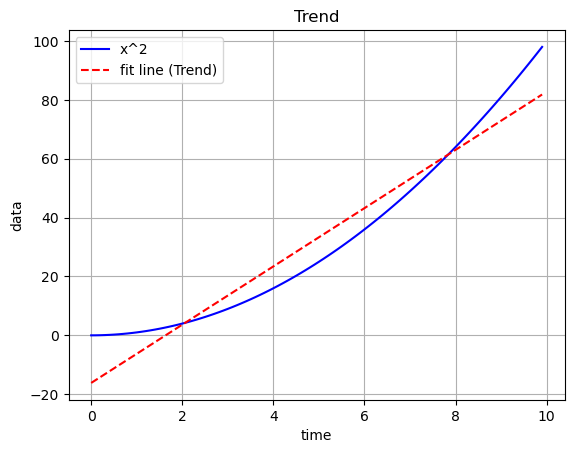

In [89]:
def Trend(time_steps, step=0.1):
    t = np.arange(0, time_steps, step)
    y = t**2
    plot_graph(t,y,'Trend','x^2')
    return y

trend_graph = Trend(10)

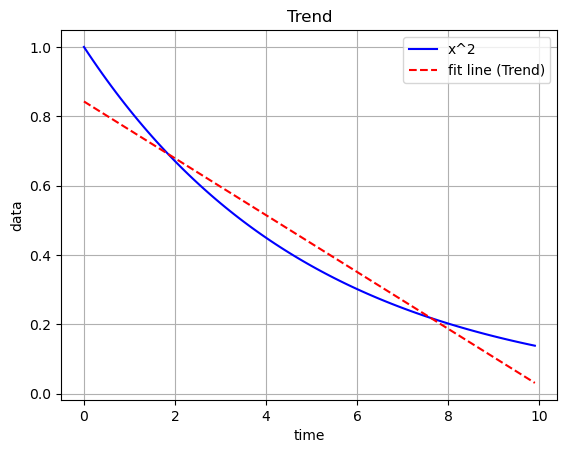

In [207]:
def Trend2(time_steps, step=0.1):
    t = np.arange(0, time_steps, step)
    y = 1 / np.exp(0.2*t)
    plot_graph(t,y,'Trend','x^2')
    return y

neg_trend_graph = Trend2(10)

## Seasonal

In [90]:
array = np.random.randn(10)
print(array)

print(np.int64(array) % 2)
print(array % 2)

[ 8.82649247e-02  8.13681815e-01  2.74712965e+00 -1.57632145e-03
  1.43192368e+00  7.19245907e-01  2.25936977e+00  2.52706831e-01
 -1.07251625e+00  1.34247973e+00]
[0 0 0 0 1 0 0 0 1 1]
[0.08826492 0.81368182 0.74712965 1.99842368 1.43192368 0.71924591
 0.25936977 0.25270683 0.92748375 1.34247973]


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]


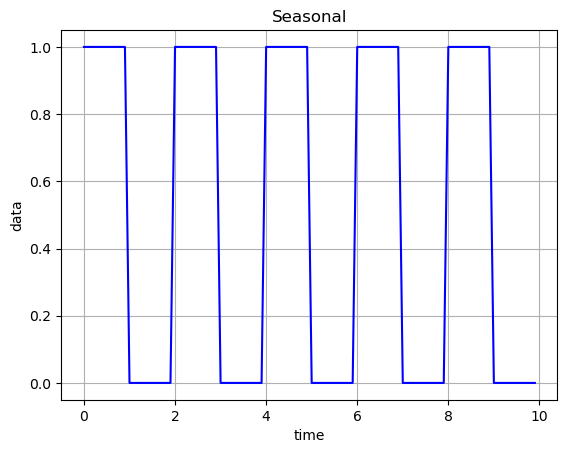

In [91]:
def seasonal1(time_duration, step=0.1):
    x = np.arange(0,time_duration, step)
    y = np.ones(time_duration)
    result = np.where(np.int16(x) % 2 == 0 ,1, 0)
    print(x)
    print(y)
    print(result)
    plot_graph(x, result, 'Seasonal', 'unit function', no_fit=True)
    return result

seasonal_graph = seasonal1(10)

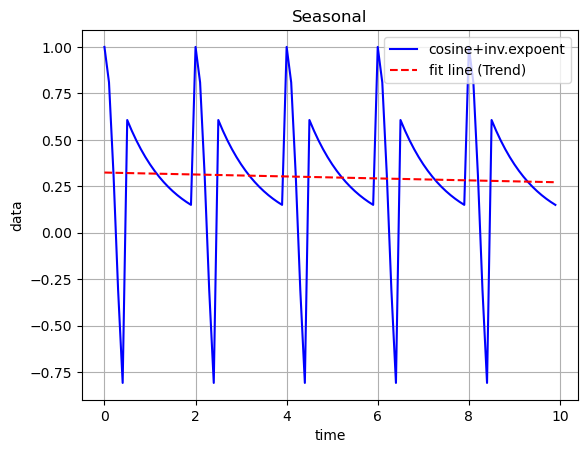

In [92]:
def seasonal2(time_steps, period, step=0.1):
    time = np.arange(0, time_steps, step)
    t = time % period
    pattern = np.where(t < 0.5, np.cos(2 * np.pi * t), 1 / np.exp(t))
    plot_graph(time, pattern, 'Seasonal', 'cosine+inv.expoent')
    return pattern

seasonal_graph2 = seasonal2(10, 2)

## Seasonal + Trend


This graph has both sesonality and trend
Sesonality of Rectangular wave
Trend of the square function



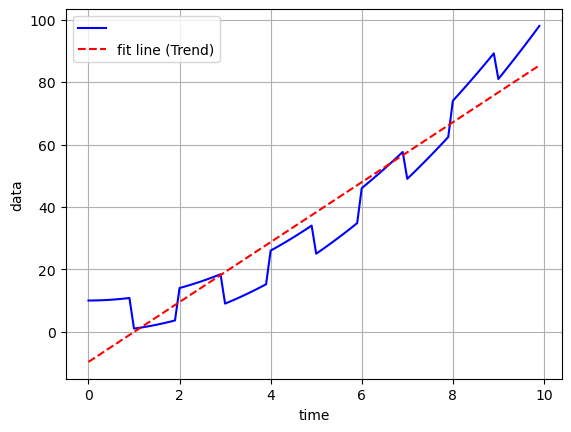

In [93]:
print(
'''
This graph has both sesonality and trend
Sesonality of Rectangular wave
Trend of the square function
'''
)

result = trend_graph + 10*seasonal_graph
time = np.arange(0,10,0.1)
plot_graph(time, result)

## Noise

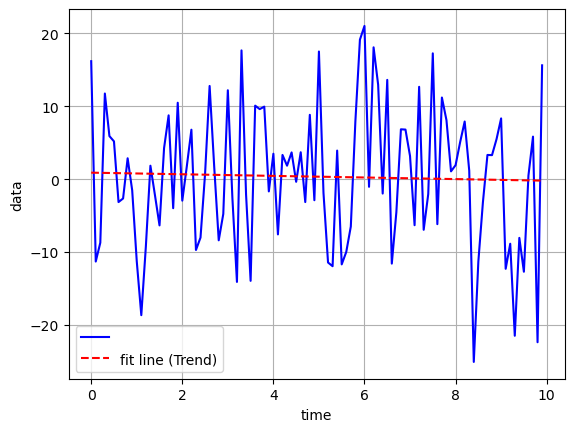

In [99]:
def noise(time_steps, amplitude, step=0.1):
    t = np.arange(0, time_steps, step)
    rand_arr = np.random.randn(len(t))
    rand_arr *= amplitude
    plot_graph(t, rand_arr)
    return rand_arr

noise_graph = noise(10, 10)

## Noisy Trends, Noise Seasonality

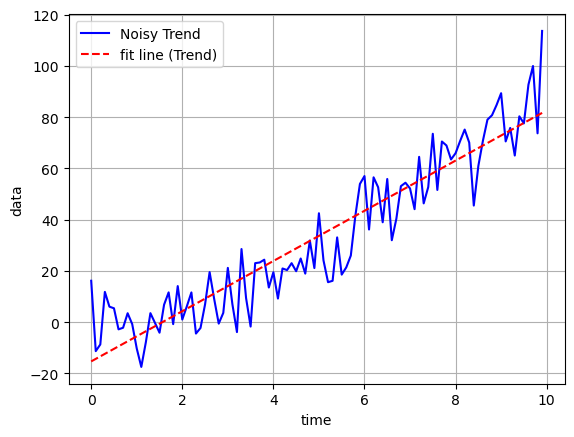

In [102]:
result = trend_graph + noise_graph
time = np.arange(0, 10, 0.1)
plot_graph(time, result, info='Noisy Trend')

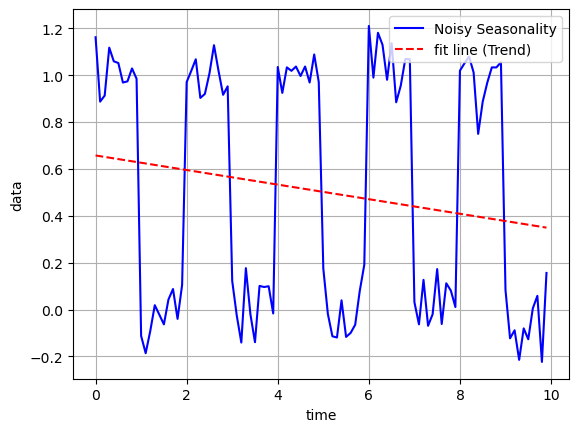

In [109]:
result = seasonal_graph + noise_graph / 100
time = np.arange(0, 10, 0.1)
plot_graph(time, result, info='Noisy Seasonality')

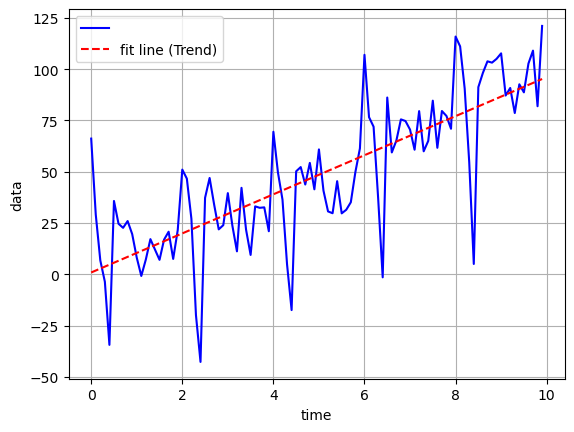

In [118]:
result = trend_graph + 50*seasonal_graph2 + noise_graph
plot_graph(time, result)

## Autocorrelation

The formula we will replicate: <br>
v(t) = v(t-1) * 0.99 + random_noise

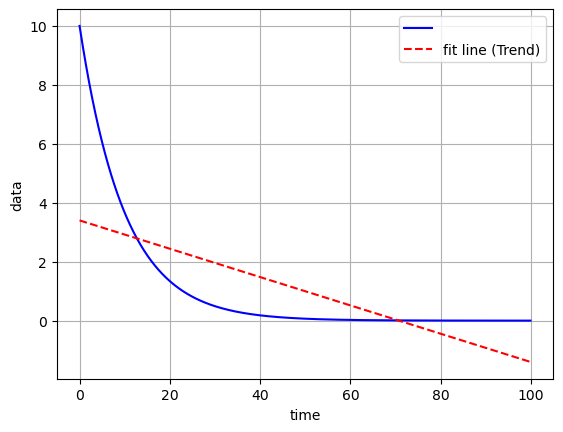


    Pure autocorellation is just like a decaying wave. As it's current value is 99% of previous value,
    It keeps on decresing till eventually reaching 0
    Current value is a copy of delayed value of the signal ie. depends on past value of the signal



In [163]:
def auto_correlation(time_steps, step=0.1):
    t = np.arange(0, time_steps, step)
    pattern = np.zeros(len(t))
    pattern[0] = 10

    for i in range(1, len(t)):
        pattern[i] = pattern[i-1] * 0.99 + 0
    
    plot_graph(t, pattern)
    return pattern

auto_graph = auto_correlation(100)
print(
'''
    Pure autocorellation is just like a decaying wave. As it's current value is 99% of previous value,
    It keeps on decresing till eventually reaching 0
    Current value is a copy of delayed value of the signal ie. depends on past value of the signal
'''
)

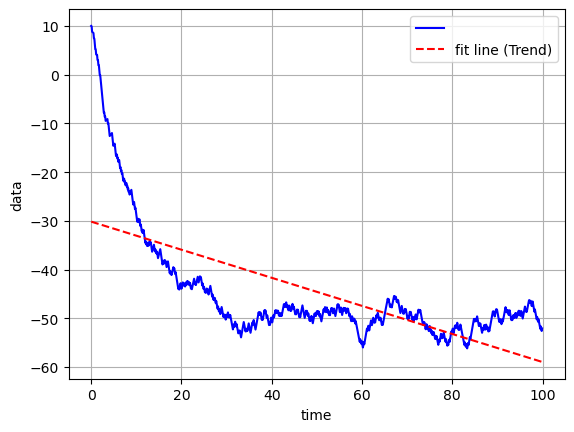

In [159]:
def auto_correlation_noisy(time_steps, step=0.1):
    t = np.arange(0, time_steps, step)
    pattern = np.zeros(len(t))
    pattern[0] = 10

    for i in range(1, len(t)):
        pattern[i] = pattern[i-1] * 0.99 + np.random.randint(-1,1)
    
    plot_graph(t, pattern)
    return pattern

auto_graph = auto_correlation_noisy(100)

[0 2 4 1 2 4 4 3 1 0]
[277 918 513 548 490 745 670 764 263 547]


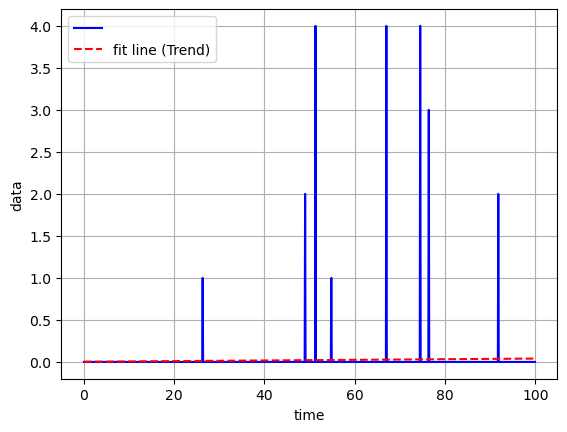

In [155]:
def impulses(time_steps, max_amp, step=0.1, num_spikes=10):
    t = np.arange(0, time_steps, step)
    spikes = np.random.randint(0, max_amp, size=(num_spikes))
    spike_location = np.random.randint(0, len(t), size=(num_spikes))
    print(spikes)
    print(spike_location)

    pattern = np.zeros(len(t))
    pattern[spike_location] = spikes
    plot_graph(t, pattern)
    return pattern

impulse_graph = impulses(100, 5, 0.1)

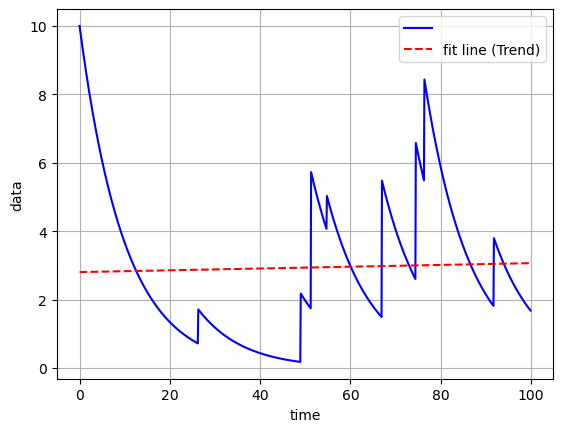


    Each spike decays just like the autocorrelated rule:
    Current value is 99% of previous value      



In [171]:
def auto_correlation_impulse(start_value):
    t = np.arange(0, 100, 0.1)
    pattern = np.zeros(len(t))
    pattern[0] = start_value

    for i in range(1, len(t)):
        pattern[i] = pattern[i-1] * 0.99 + impulse_graph[i]
    
    plot_graph(t, pattern)
    return pattern

aci_graph = auto_correlation_impulse(10)
print(
'''
    Each spike decays just like the autocorrelated rule:
    Current value is 99% of previous value      
'''
)

### Auto correlation with Trend

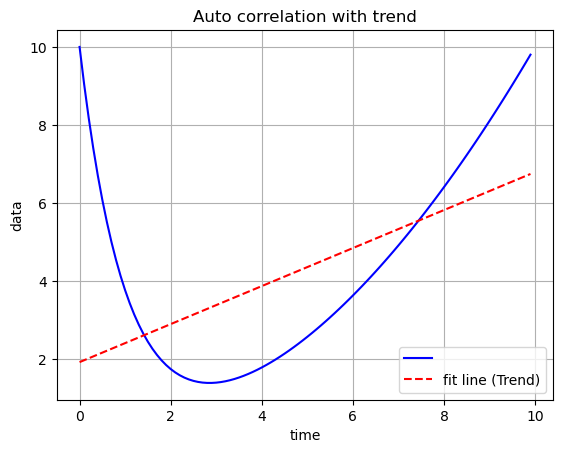

In [179]:
act_graph = auto_graph[::10] + trend_graph / 10
plot_graph(time, act_graph, "Auto correlation with trend")

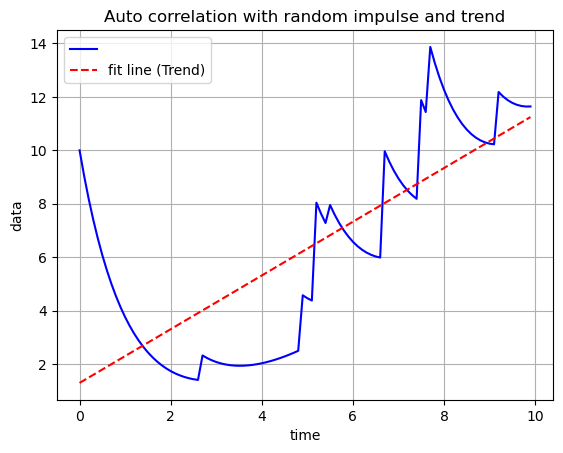

In [175]:
acit_graph = aci_graph[::10] + trend_graph / 10
plot_graph(time, acit_graph, "Auto correlation with random impulse and trend")

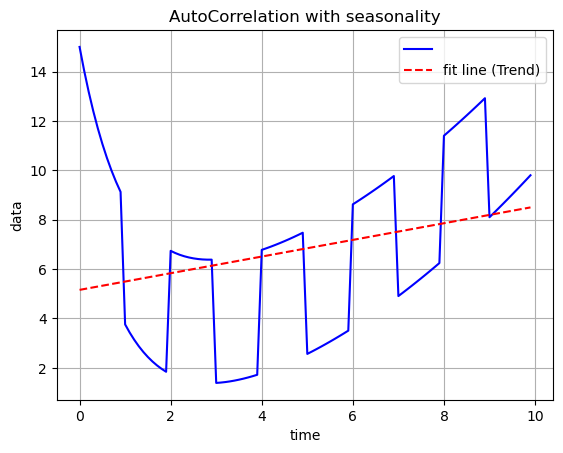

In [181]:
acts_graph = act_graph + 5*seasonal_graph
plot_graph(time, acts_graph, 'AutoCorrelation with seasonality')

## Non stationary Time series

(100,) (100,)


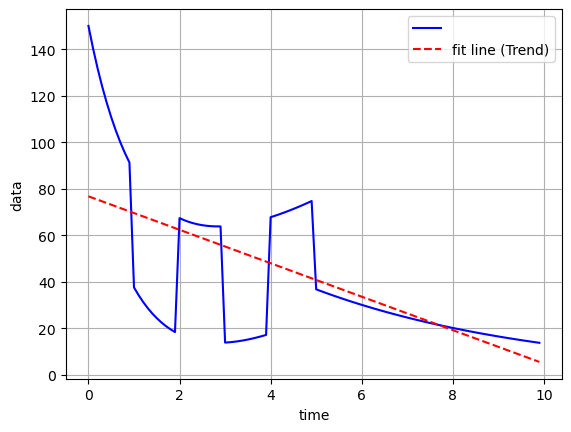


    The Trend of the graph suddenly changes at t = 5. 
    This graph is non-stationary



In [212]:
def non_stationary(event):
    arr1 = 10*acts_graph[:event]
    arr2 = 100*neg_trend_graph[event:]
    pattern = np.concatenate((arr1, arr2))
    print(pattern.shape, time.shape)
    plot_graph(time, pattern)

result = non_stationary(50)
print(
'''
    The Trend of the graph suddenly changes at t = 5. 
    This graph is non-stationary
'''
)